# 의사 결정 모델을 활용한 자동차 품질 예측

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# 1. Data Load

**데이터 설명**

| 변수 명           | 설명                                    |
| ----------------- | --------------------------------------- |
| date_time         | 날짜              |
| T1  ~ T15           | 센서로부터 수집된 데이터              |
| observe1        | 센서로부터 수집된 데이터                 |
| observe2         | 센서로부터 수집된 데이터                  |
| quality        | 자동차 품질(수치형)                  |




In [ ]:
df = pd.read_csv('./cars_part_quality.csv')

In [ ]:
df.head()

,date_time,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,observe1,observe2,quality
0,2015-01-04 0:05,277,326,273,322,335,352,505,501,670,326,379,337,231,236,242,153.77,7.90,392
1,2015-01-04 1:05,277,253,272,320,333,355,500,501,687,337,396,335,234,242,230,158.27,6.96,384
2,2015-01-04 2:05,262,218,260,326,336,330,505,499,443,347,399,332,243,251,240,153.36,7.29,393
3,2015-01-04 3:05,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
4,2015-01-04 4:05,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400


In [ ]:
#Quality 문제가 연속형이므로, 이를 분류 문제로 바꾸기 위해 범주형 변수로 변환시킬 것인데

#어떤 근거로 수치를 범주형 변수로 바꿀 것인가?

##Quality 문제가 연속형
* 이를 분류 문제로 바꾸기 위해 범주형 변수로 변환시켜야 함

###어떤 근거로 수치를 범주형 변수로 바꿀 것인가?

(array([2.000e+00, 8.000e+00, 2.700e+01, 6.500e+01, 1.730e+02, 3.720e+02,
        4.390e+02, 6.820e+02, 8.760e+02, 1.203e+03, 1.699e+03, 1.842e+03,
        2.138e+03, 2.283e+03, 2.267e+03, 2.461e+03, 1.913e+03, 1.139e+03,
        3.770e+02, 3.400e+01]),
 array([221. , 235.2, 249.4, 263.6, 277.8, 292. , 306.2, 320.4, 334.6,
        348.8, 363. , 377.2, 391.4, 405.6, 419.8, 434. , 448.2, 462.4,
        476.6, 490.8, 505. ]),
 <a list of 20 Patch objects>)

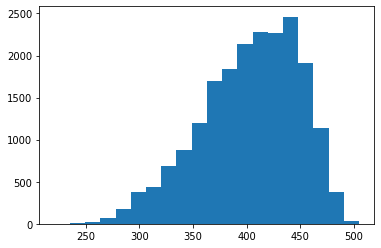

In [ ]:
#Quality의 분포 확인하기
plt.hist(df['quality'], bins = 20)

In [ ]:
#33% 미만: 나쁨(0)
#33% 이상 66% 미만: 보통(1)
#66% 이상: 좋음(2)

print(df.sort_values(by = 'quality'))

              date_time   T1   T2   T3   T4   T5   T6   T7   T8   T9  T10  \
11285   2016-04-18 5:05  206  204  204  421  310  421  576  583  665  317   
12383  2016-06-02 23:05  206  215  205  305  299  288  588  617  598  437   
11286   2016-04-18 6:05  195  197  207  398  307  474  555  574  586  302   
11964  2016-05-16 12:05  260  247  247  312  324  308  590  607  599  355   
2781   2015-04-29 21:05  237  233  242  313  305  322  579  567  576  337   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1079   2015-02-17 23:05  309  311  303  337  327  340  391  403  418  394   
1078   2015-02-17 22:05  308  313  299  349  355  342  397  404  392  381   
1080    2015-02-18 0:05  299  300  300  348  338  341  403  397  368  409   
1077   2015-02-17 21:05  305  311  311  346  343  339  402  405  406  380   
1081    2015-02-18 1:05  293  282  290  355  357  357  414  391  308  408   

       T11  T12  T13  T14  T15  observe1  observe2  quality  
11285  326  3

# 2. Data Preprocessing

#총 두가지 전처리 방법 소개

## 2-1. 첫번째 전처리 방법

In [ ]:
#33%, 66%의 quality 분위수를 안 뒤, loc를 사용하는 방법

df = df.sort_values(by = 'quality').reset_index(drop=True)

In [ ]:
df

,date_time,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,observe1,observe2,quality
0,2016-04-18 5:05,206,204,204,421,310,421,576,583,665,317,326,305,220,210,206,158.84,7.54,221
1,2016-06-02 23:05,206,215,205,305,299,288,588,617,598,437,383,404,246,202,191,165.98,7.59,229
2,2016-04-18 6:05,195,197,207,398,307,474,555,574,586,302,282,308,200,205,211,159.45,8.97,242
3,2016-05-16 12:05,260,247,247,312,324,308,590,607,599,355,339,353,215,202,203,154.51,9.45,242
4,2015-04-29 21:05,237,233,242,313,305,322,579,567,576,337,346,353,230,228,225,159.95,7.58,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-02-17 23:05,309,311,303,337,327,340,391,403,418,394,399,386,297,290,297,182.27,8.39,501
19996,2015-02-17 22:05,308,313,299,349,355,342,397,404,392,381,405,399,295,292,297,185.75,7.41,501
19997,2015-02-18 0:05,299,300,300,348,338,341,403,397,368,409,382,390,300,292,299,183.53,5.69,501
19998,2015-02-17 21:05,305,311,311,346,343,339,402,405,406,380,398,384,296,297,298,182.08,7.46,503


In [ ]:
print('33%에 속하는 quality 위치는 index:', int(len(df['quality'])*0.33), '이고, 66%에 속하는 quality 위치는 index:', int(len(df['quality'])*0.66))

33%에 속하는 quality 위치는 index: 6600 이고, 66%에 속하는 quality 위치는 index: 13200


In [ ]:
print('33%의 quality 값=', df['quality'][6600], '\n66%의 quality 값=', df['quality'][13200])
#\n: enter 하겠다.

33%의 quality 값= 386 
66%의 quality 값= 428


In [ ]:
#첫번째 전처리 접근 방법
df.loc[df['quality'] < 386, 'quality'] = 0
df.loc[(df['quality'] >= 386)&(df['quality'] < 428), 'quality'] = 1
df.loc[df['quality'] >= 428, 'quality'] = 2
df

,date_time,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,observe1,observe2,quality
0,2016-04-18 5:05,206,204,204,421,310,421,576,583,665,317,326,305,220,210,206,158.84,7.54,0
1,2016-06-02 23:05,206,215,205,305,299,288,588,617,598,437,383,404,246,202,191,165.98,7.59,0
2,2016-04-18 6:05,195,197,207,398,307,474,555,574,586,302,282,308,200,205,211,159.45,8.97,0
3,2016-05-16 12:05,260,247,247,312,324,308,590,607,599,355,339,353,215,202,203,154.51,9.45,0
4,2015-04-29 21:05,237,233,242,313,305,322,579,567,576,337,346,353,230,228,225,159.95,7.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-02-17 23:05,309,311,303,337,327,340,391,403,418,394,399,386,297,290,297,182.27,8.39,2
19996,2015-02-17 22:05,308,313,299,349,355,342,397,404,392,381,405,399,295,292,297,185.75,7.41,2
19997,2015-02-18 0:05,299,300,300,348,338,341,403,397,368,409,382,390,300,292,299,183.53,5.69,2
19998,2015-02-17 21:05,305,311,311,346,343,339,402,405,406,380,398,384,296,297,298,182.08,7.46,2


## 2-2. 두번째 전처리 방법

In [ ]:
#데이터 다시 불러오기
df = pd.read_csv('./cars_part_quality.csv')

df = df.sort_values(by = 'quality').reset_index(drop=True)
#index가 무작위로 된 것을 0부터 다시 재할당

#그렇다면 quality 변수는 낮은 순으로부터 분위수처럼 정렬됨
#33%, 66%의 길이에 있는 변수를 선택하면 그게 곧 분위수임

label = []
for i in range(len(df)):
  if i < int(np.round(len(df)*0.33)):
    label.append(0)
  elif i >= int(np.round(len(df)*0.3)) and i < int(np.round(len(df)*0.66)):
    label.append(1)
  else:
    label.append(2)

In [ ]:
label = pd.DataFrame(label)

In [ ]:
label

,0
0,0
1,0
2,0
3,0
4,0
...,...
19995,2
19996,2
19997,2
19998,2


In [ ]:
counts = label.value_counts()
print(counts)

2    6800
0    6600
1    6600
dtype: int64


In [ ]:
df

,date_time,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,observe1,observe2,quality
0,2016-04-18 5:05,206,204,204,421,310,421,576,583,665,317,326,305,220,210,206,158.84,7.54,221
1,2016-06-02 23:05,206,215,205,305,299,288,588,617,598,437,383,404,246,202,191,165.98,7.59,229
2,2016-04-18 6:05,195,197,207,398,307,474,555,574,586,302,282,308,200,205,211,159.45,8.97,242
3,2016-05-16 12:05,260,247,247,312,324,308,590,607,599,355,339,353,215,202,203,154.51,9.45,242
4,2015-04-29 21:05,237,233,242,313,305,322,579,567,576,337,346,353,230,228,225,159.95,7.58,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-02-17 23:05,309,311,303,337,327,340,391,403,418,394,399,386,297,290,297,182.27,8.39,501
19996,2015-02-17 22:05,308,313,299,349,355,342,397,404,392,381,405,399,295,292,297,185.75,7.41,501
19997,2015-02-18 0:05,299,300,300,348,338,341,403,397,368,409,382,390,300,292,299,183.53,5.69,501
19998,2015-02-17 21:05,305,311,311,346,343,339,402,405,406,380,398,384,296,297,298,182.08,7.46,503


In [ ]:
x = df.iloc[:, 1:18]
col = x.columns
x.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,observe1,observe2
0,206,204,204,421,310,421,576,583,665,317,326,305,220,210,206,158.84,7.54
1,206,215,205,305,299,288,588,617,598,437,383,404,246,202,191,165.98,7.59
2,195,197,207,398,307,474,555,574,586,302,282,308,200,205,211,159.45,8.97
3,260,247,247,312,324,308,590,607,599,355,339,353,215,202,203,154.51,9.45
4,237,233,242,313,305,322,579,567,576,337,346,353,230,228,225,159.95,7.58


#2-3 데이터 전처리

In [ ]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.49014085, 0.47368421, 0.46728972, ..., 0.49850746, 0.22438392,
        0.52122642],
       [0.49014085, 0.48976608, 0.46884735, ..., 0.4761194 , 0.34014267,
        0.52712264],
       [0.47464789, 0.46345029, 0.47196262, ..., 0.50597015, 0.23427367,
        0.68985849],
       ...,
       [0.62112676, 0.61403509, 0.61682243, ..., 0.63731343, 0.62467575,
        0.30306604],
       [0.62957746, 0.63011696, 0.63395639, ..., 0.6358209 , 0.60116732,
        0.51179245],
       [0.61267606, 0.5877193 , 0.60124611, ..., 0.6358209 , 0.66034371,
        0.57665094]])

  * 원래는 trainx를 기준으로 scaling 한 후, testx에 적용하는 방법을 사용해야 함

#2-4 Train / Test data 분리

In [ ]:
trainx, testx, trainy, testy = train_test_split(x, label, test_size = 0.3)
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(14000, 17)
(14000, 1)
(6000, 17)
(6000, 1)


In [ ]:
trainy

,0
7085,1
4073,0
6054,0
16944,2
19231,2
...,...
7255,1
7568,1
15920,2
19449,2


In [ ]:
trainy = trainy.to_numpy()
testy = testy.to_numpy()

트리를 구성하고 싶은데 어떤 방식으로 트리를 만들어 나가야 하나?

순도(Pure) 혹은 불순도(impurity)를 활용한다.

특정 지표를 기준으로 데이터를 나누었을 때, Yes or No로 완전 분류되는 것이 변별력이 좋은 질문이라고 이해할 수 있다.

이런 질문들은 불순도가 0이라고 할 수 있고, 이런 질문들 위주로 쌓아 나가면 된다.

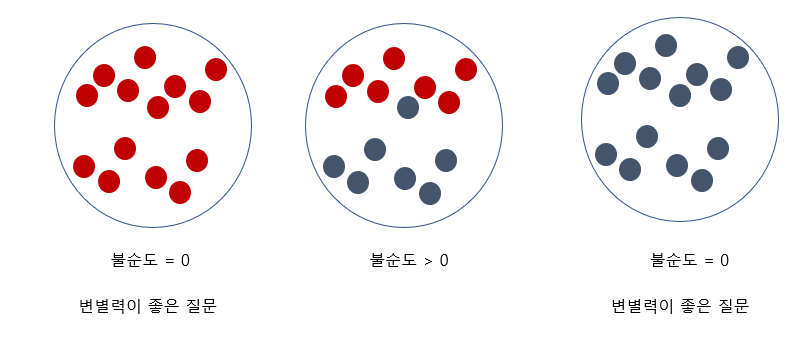

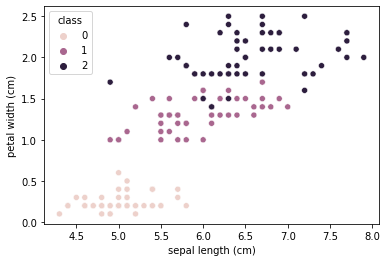

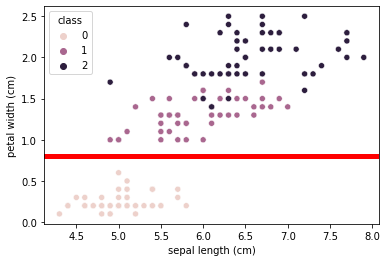

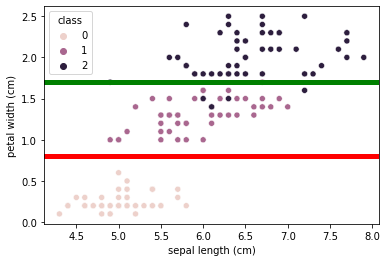

## 이런 방식으로 분류를 해 나가는 모형이 의사결정나무

##장점
1. 계산 비용이 적음(Yes or No 문제를 지속해서 해결하는 문제)

2. 규칙을 기반으로 하기 때문에 결측치가 있어도 처리할 수 있음

##단점
1. 수평이나 수직같은 선으로 분류되지 않는 데이터 형태라면 성능이 하락하며, 데이터가 분류되기 힘들다면 트리의 구조가 상당히 복잡해질 수 있음

2. 과적합 문제에 취약함
(마지막 그림의 검은색 점이 섞인 부분을 분류하는 의사 결정 나무는 상당히 복잡해지며, 이는 학습용 데이터셋에 과적합될 위험이 있음)

#3. 의사 결정 나무 모델 구축

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#모델 정의
model = DecisionTreeClassifier()

In [ ]:
model = model.fit(trainx, trainy)

In [ ]:
pred_train = model.predict(trainx)

In [ ]:
pred_train

array([1, 0, 0, ..., 2, 2, 0])

#4. 모델 평가

In [ ]:
#학습용 데이터셋일 뿐, 검증된 성능이 아님
from sklearn.metrics import confusion_matrix
confusion_matrix(trainy, pred_train)

array([[4608,    0,    0],
       [   0, 4593,    0],
       [   0,    0, 4799]])

In [ ]:
#Test 데이터에 대한 Y 추출
pred_test = model.predict(testx)
confusion_matrix(testy, pred_test)

array([[1611,  366,   15],
       [ 353, 1282,  372],
       [   7,  329, 1665]])

In [ ]:
#정확도 계산
#행렬의 대각 원소의 합

a = confusion_matrix(testy, pred_test)
acc = np.sum(np.diag(a)) / len(testy)

#testy == confusion_matrix(testy, pred_test).sum() 동일함

In [ ]:
acc

0.7596666666666667

In [ ]:
print('검증 데이터 정확도:', np.round(acc*100, 2), '% 입니다.')

검증 데이터 정확도: 75.97 % 입니다.


In [ ]:
#나무의 길이가 너무 깊어지게 된다면?
#나무의 길이가 너무 얕다면?

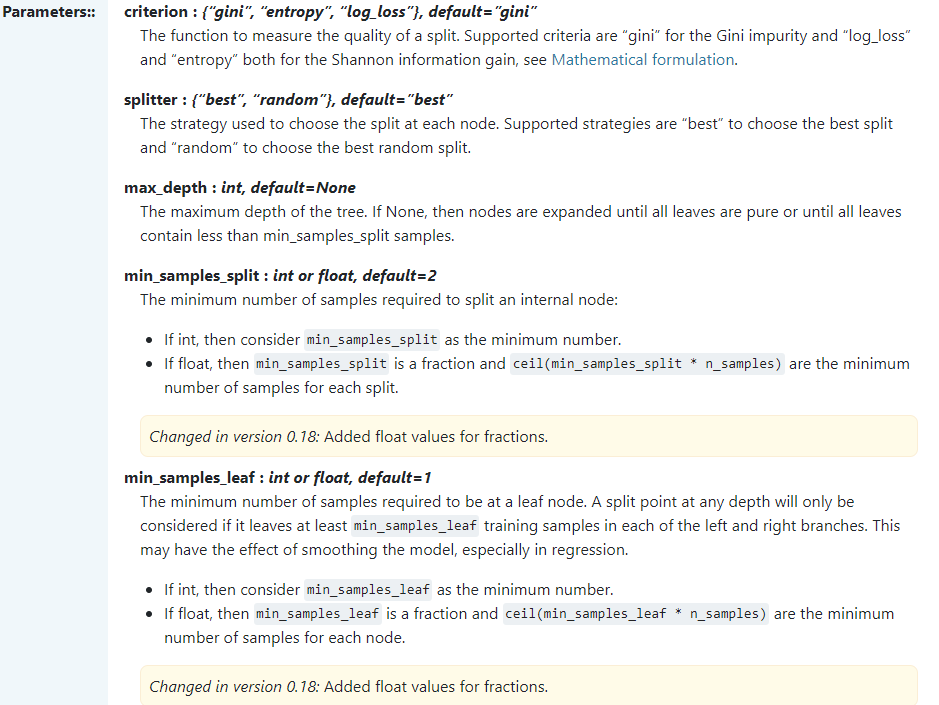

* criterion = 불순도를 측정할 때, 지니 계수를 사용할 것인지 혹은 엔트로피를 사용할 것인지?

* max_depth = 트리의 최대 깊이

* min_samples_split = 노드를 분할하기 위한 최소 데이터 수
과적합 해결 목적
default = 2
너무 적게 설정한다면, 학습용 데이터에 너무 알맞도록 설계된다.
학습용 데이터의 모든 점들을 분할할 수 있으나, 검증용에 대해서는 과적합의 문제로 성능 감소 가능성이 있다.

* min_samples_leaf = Leaf 노드가 되기 위해 필요한 최소 데이터 수
과적합 해결 목적
마찬가지로, 과적합 문제를 방지하기 위한 파라미터

##알맞은 파라미터를 분석가가 임의로 선정하는 것: 중요함

#5. 모델 파라미터 변경

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy')
model = model.fit(trainx, trainy)
pred_test = model.predict(testx)
a = confusion_matrix(testy, pred_test)
acc = np.sum(np.diag(a)) / len(testy)
print('검증 데이터의 정확도는 {}% 입니다.'.format(np.round(acc*100, 2)))

검증 데이터의 정확도는 77.3% 입니다.


In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
model = model.fit(trainx, trainy)
pred_test = model.predict(testx)
a = confusion_matrix(testy, pred_test)
acc = np.sum(np.diag(a)) / len(testy)
print('검증 데이터의 정확도는 {}% 입니다.'.format(np.round(acc*100, 2)))

검증 데이터의 정확도는 76.08 입니다.


#5. 모델 시각화

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file = 'tree.dot', class_names = ['bad', 'normal', 'good'], feature_names = col, impurity = True, filled = True)


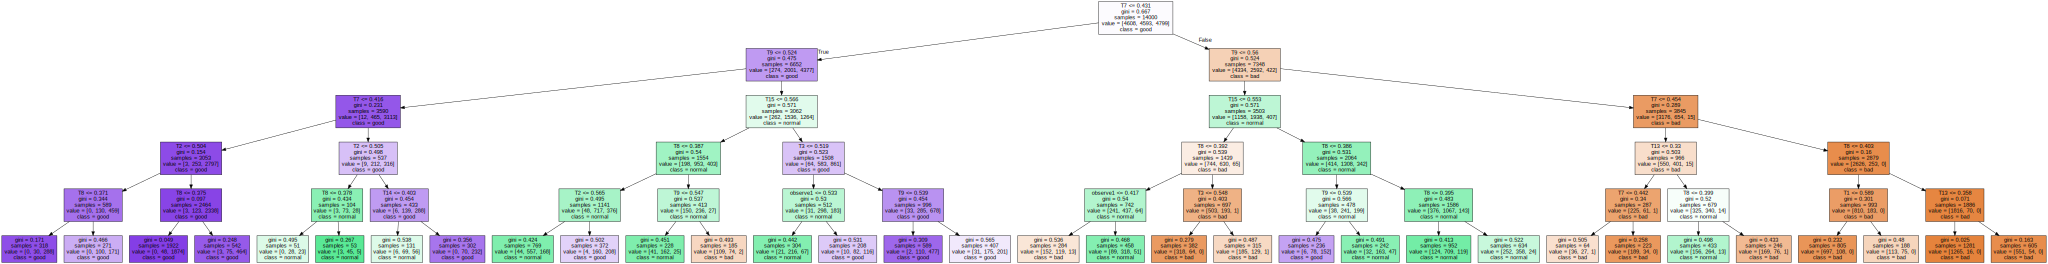

In [ ]:
import graphviz
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

* 직관적으로 이해하기 쉬움

## 모델의 파라미터를 반복적으로 변화시켜서 결과 비교

In [ ]:
for i in range(10):
  model = DecisionTreeClassifier(criterion = 'gini', max_depth = i+5)
  model = model.fit(trainx, trainy)
  pred_test = model.predict(testx)
  a = confusion_matrix(testy, pred_test)
  acc = np.sum(np.diag(a)) / len(testy)
  print('검증 데이터의 정확도는 {}% 입니다.'.format(np.round(acc*100, 2)))

검증 데이터의 정확도는 76.08% 입니다.
검증 데이터의 정확도는 77.35% 입니다.
검증 데이터의 정확도는 77.68% 입니다.
검증 데이터의 정확도는 78.42% 입니다.
검증 데이터의 정확도는 78.12% 입니다.
검증 데이터의 정확도는 78.42% 입니다.
검증 데이터의 정확도는 77.53% 입니다.
검증 데이터의 정확도는 77.17% 입니다.
검증 데이터의 정확도는 76.63% 입니다.
검증 데이터의 정확도는 76.12% 입니다.
